In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'ebb0d8e5-89ef-4c99-a08b-7904edcb4394',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#Put the following into Anaconda prompt to allow this code to pull data
#"jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"

{'status': {'timestamp': '2023-05-10T08:20:30.849Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 9612}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10207, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [11]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#this normalizes the data and makes it organized to be viewed in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now',utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10207,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.936903e+07,1.936903e+07,False,NaN,1,NaN,NaN,None,2023-05-10T08:18:00.000Z,27594.704035,1.347787e+10,-21.9622,-0.142199,-0.100398,-3.699877,-2.657351,36.641857,21.621565,5.344827e+11,46.9648,5.794888e+11,None,2023-05-10T08:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 08:20:31.804397+00:00
1,1027,Ethereum,ETH,ethereum,6858,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203177e+08,1.203177e+08,False,NaN,2,NaN,NaN,None,2023-05-10T08:18:00.000Z,1840.974588,5.866563e+09,-29.4472,-0.162818,-0.181229,-1.323807,-1.064271,28.553339,12.816257,2.215018e+11,19.4633,2.215018e+11,None,2023-05-10T08:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 08:20:31.804397+00:00
2,825,Tether,USDT,tether,53064,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.247941e+10,8.609064e+10,False,NaN,3,NaN,NaN,None,2023-05-10T08:18:00.000Z,1.000435,2.109665e+10,-27.1110,-0.007740,-0.013737,0.002060,-0.004921,-0.565089,0.028047,8.251525e+10,7.2506,8.612805e+10,None,2023-05-10T08:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-10 08:20:31.804397+00:00
3,1839,BNB,BNB,bnb,1347,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558608e+08,1.558608e+08,False,NaN,4,NaN,NaN,None,2023-05-10T08:18:00.000Z,311.934716,4.525204e+08,-21.9346,-0.042391,-1.057978,-3.455737,-0.415357,14.037375,-3.353901,4.861839e+10,4.2721,4.861839e+10,None,2023-05-10T08:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 08:20:31.804397+00:00
4,3408,USD Coin,USDC,usd-coin,12308,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.015369e+10,3.015369e+10,False,NaN,5,NaN,NaN,None,2023-05-10T08:18:00.000Z,0.999981,2.831639e+09,-25.6440,-0.010989,0.003182,0.002807,0.009243,12.610514,-0.001476,3.015313e+10,2.6495,3.015313e+10,None,2023-05-10T08:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-10 08:20:31.804397+00:00
5,52,XRP,XRP,xrp,941,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.183782e+10,9.998897e+10,False,NaN,6,NaN,NaN,None,2023-05-10T08:18:00.000Z,0.426295,8.728789e+08,-22.5569,-0.299857,0.327876,-7.110990,-15.810945,16.804107,8.413288,2.209820e+10,1.9418,4.262949e+10,None,2023-05-10T08:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 08:20:31.804397+00:00
6,2010,Cardano,ADA,cardano,782,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.484195e+10,3.576134e+10,False,NaN,7,NaN,NaN,None,2023-05-10T08:18:00.000Z,0.361668,1.824622e+08,-32.9099,-0.250549,-0.776131,-6.056860,-6.771175,16.527397,-6.837167,1.260121e+10,1.1073,1.627504e+10,None,2023-05-10T08:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 08:20:31.804397+00:00
7,74,Dogecoin,DOGE,dogecoin,703,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.392851e+11,1.392851e+11,False,NaN,8,NaN,NaN,None,2023-05-10T08:18:00.000Z,0.072945,2.198827e+08,-43.6854,-0.191780,0.355244,-6.841991,-12.196635,12.468213,-17.086550,1.016018e+10,0.8924,1.016018e+10,None,2023-05-10T08:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 08:20:31.804397+00:00
8,5426,Solana,SOL,solana,459,2020-04-10T00:00:00.0

In [39]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'ebb0d8e5-89ef-4c99-a08b-7904edcb4394',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#Put the following into Anaconda prompt to allow this code to pull data
#"jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"

    #we will append the new data that came in to the old dataframe
    list_storage = []
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now', utc=True)
    list_storage.append(df2)
    df = pd.concat(list_storage)
    
    import os
    path = r"D:/Ron/SQL training/Python automated crypto pull api/API.csv"
    
    if not os.path.isfile(path):
        df.to_csv(path, header='column_names')
    else:
        df.to_csv(path, mode='a', header=False)

In [40]:
import os
from time import time
from time import sleep

#we pull the data within our limited api key (333 pulls per day)
for i in range(333):
    api_runner()
    print('API Runner ran successfully')
    sleep(60) #sleep for 1 minute
exit()

API Runner ran successfully
API Runner ran successfully


KeyboardInterrupt: 

In [41]:
import os
path = r"D:/Ron/SQL training/Python automated crypto pull api/API.csv"
df72 = pd.read_csv(path)
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10203,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19368200.00000,19368200.00000,False,NaN,1,NaN,NaN,NaN,2023-05-09T08:51:00.000Z,27617.58054,17078141236.75880,19.33210,-0.04971,-0.86277,-1.54639,-0.82935,38.70669,19.01176,534902823402.79205,46.91920,579969191326.94995,NaN,2023-05-09T08:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-09 08:53:14.805530+00:00
1,1,1027,Ethereum,ETH,ethereum,6853,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120325421.18948,120325421.18948,False,NaN,2,NaN,NaN,NaN,2023-05-09T08:51:00.000Z,1843.21719,8226861092.10077,-2.82400,-0.18454,-0.31637,0.50120,0.41609,31.07040,10.14062,221785884377.30081,19.45400,221785884377.29999,NaN,2023-05-09T08:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-09 08:53:14.805530+00:00
2,2,825,Tether,USDT,tether,52971,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,82338704350.17496,86090638896.21471,False,NaN,3,NaN,NaN,NaN,2023-05-09T08:51:00.000Z,1.00058,28353611541.07658,16.11200,-0.01229,-0.07407,0.04824,0.03729,0.06056,0.04931,82386720668.43742,7.22660,86140843178.02000,NaN,2023-05-09T08:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-09 08:53:14.805530+00:00
3,3,1839,BNB,BNB,bnb,1343,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155861009.30986,155861009.30986,False,NaN,4,NaN,NaN,NaN,2023-05-09T08:51:00.000Z,315.66605,510495252.17979,-0.31550,0.27291,-0.11028,-2.46381,1.86052,15.98695,-4.52956,49200028799.72465,4.31560,49200028799.72000,NaN,2023-05-09T08:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-09 08:53:14.805530+00:00
4,4,3408,USD Coin,USDC,usd-coin,12252,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,30246659244.53994,30246659244.53994,False,NaN,5,NaN,NaN,NaN,2023-05-09T08:51:00.000Z,0.99998,3794662197.89192,12.32510,-0.00684,-0.00366,0.00916,0.03932,0.00691,0.00203,30246117878.34448,2.65300,30246117878.34000,NaN,2023-05-09T08:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-09 08:53:14.805530+00:00
5,5,52,XRP,XRP,xrp,941,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51837820505.00000,99988965239.00000,False,NaN,6,NaN,NaN,NaN,2023-05-09T08:51:00.000Z,0.42331,1121539973.76101,30.07690,-0.26419,-2.51460,-8.53296,-15.94990,14.68621,5.76846,21943238310.68374,1.92480,42330557297.58000,NaN,2023-05-09T08:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-09 08:53:14.805530+00:00
6,6,2010,Cardano,ADA,cardano,781,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34837199875.30400,35761344982.35800,False,NaN,7,NaN,NaN,NaN,2023-05-09T08:51:00.000Z,0.36338,269155058.83344,13.28300,-0.11851,-0.74185,-6.21711,-5.76084,18.68924,-8.73645,12659154457.60067,1.11040,16352116491.31000,NaN,2023-05-09T08:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-09 08:53:14.805530+00:00
7,7,74,Dogecoin,DOGE,dogecoin,701,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139271436383.70523,139271436383.70523,False,NaN,8,NaN,NaN,NaN,2023-05-09T08:51:00.000Z,0.07256,388217637.06131,28.88500,-0.04797,-2.78670,-7.66323,-10.91294,11.20924,-20.83438,10104955566.11

In [42]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10207,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19369031.00000,19369031.00000,False,NaN,1,NaN,NaN,None,2023-05-10T08:54:00.000Z,27567.19988,13479847367.05887,-20.91050,-0.03987,-0.06932,-4.10885,-2.64873,33.63635,21.33023,533949949025.48889,46.95530,578911197443.76001,None,2023-05-10T08:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 08:56:13.736770+00:00
1,1027,Ethereum,ETH,ethereum,6858,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120317700.84569,120317700.84569,False,NaN,2,NaN,NaN,None,2023-05-10T08:54:00.000Z,1837.78429,5878085271.27252,-28.36200,-0.15110,-0.21229,-1.79890,-1.14193,26.75856,12.45828,221117980711.29312,19.44940,221117980711.29001,None,2023-05-10T08:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 08:56:13.736770+00:00
2,825,Tether,USDT,tether,53064,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82479410640.99255,86090638896.21469,False,NaN,3,NaN,NaN,None,2023-05-10T08:54:00.000Z,1.00041,21164927956.39659,-25.26990,0.01718,-0.00328,-0.00261,-0.02266,-0.47202,0.02434,82512854249.22844,7.25780,86125546779.00999,None,2023-05-10T08:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-10 08:56:13.736770+00:00
3,1839,BNB,BNB,bnb,1347,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155860770.59341,155860770.59341,False,NaN,4,NaN,NaN,None,2023-05-10T08:54:00.000Z,311.50374,449269494.05947,-12.09220,-0.20198,-1.26661,-3.78017,-0.53754,12.98563,-3.55806,48551213495.46741,4.27050,48551213495.47000,None,2023-05-10T08:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 08:56:13.736770+00:00
4,3408,USD Coin,USDC,usd-coin,12309,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,30153693813.12995,30153693813.12995,False,NaN,5,NaN,NaN,None,2023-05-10T08:54:00.000Z,0.99994,2841358781.45231,-24.90540,0.01814,0.01063,-0.00789,0.00434,8.53627,-0.01588,30152025069.20176,2.65220,30152025069.20000,None,2023-05-10T08:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-10 08:56:13.736770+00:00
5,52,XRP,XRP,xrp,942,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51837820505.00000,99988965239.00000,False,NaN,6,NaN,NaN,None,2023-05-10T08:54:00.000Z,0.42466,879148725.21538,-21.59500,-0.67849,0.40035,-7.73037,-16.10191,15.78662,8.08641,22013432310.87724,1.93630,42465968083.58000,None,2023-05-10T08:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 08:56:13.736770+00:00
6,2010,Cardano,ADA,cardano,782,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34841951122.27800,35761344982.35800,False,NaN,7,NaN,NaN,None,2023-05-10T08:54:00.000Z,0.36033,184749517.99443,-31.27770,-0.62159,-0.77603,-6.60947,-7.12607,15.41778,-7.23577,12554636329.89622,1.10430,16214896601.59000,None,2023-05-10T08:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 08:56:13.736770+00:00
7,74,Dogecoin,DOGE,dogecoin,703,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139285136383.70526,139285136383.70526,False,NaN,8,NaN,NaN,None,2023-05-10T08:54:00.000Z,0.07286,219899964.08560,-43.32520,-0.29813,0.46943,-7.13618,-12.27621,11.48201,-17.55286,10148626836.192

In [43]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [44]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10207,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19369031.00000,19369031.00000,False,NaN,1,NaN,NaN,None,2023-05-10T08:54:00.000Z,27567.19988,13479847367.05887,-20.91050,-0.03987,-0.06932,-4.10885,-2.64873,33.63635,21.33023,533949949025.48889,46.95530,578911197443.76001,None,2023-05-10T08:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 08:56:13.736770+00:00
1,1027,Ethereum,ETH,ethereum,6858,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120317700.84569,120317700.84569,False,NaN,2,NaN,NaN,None,2023-05-10T08:54:00.000Z,1837.78429,5878085271.27252,-28.36200,-0.15110,-0.21229,-1.79890,-1.14193,26.75856,12.45828,221117980711.29312,19.44940,221117980711.29001,None,2023-05-10T08:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 08:56:13.736770+00:00
2,825,Tether,USDT,tether,53064,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82479410640.99255,86090638896.21469,False,NaN,3,NaN,NaN,None,2023-05-10T08:54:00.000Z,1.00041,21164927956.39659,-25.26990,0.01718,-0.00328,-0.00261,-0.02266,-0.47202,0.02434,82512854249.22844,7.25780,86125546779.00999,None,2023-05-10T08:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-10 08:56:13.736770+00:00
3,1839,BNB,BNB,bnb,1347,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155860770.59341,155860770.59341,False,NaN,4,NaN,NaN,None,2023-05-10T08:54:00.000Z,311.50374,449269494.05947,-12.09220,-0.20198,-1.26661,-3.78017,-0.53754,12.98563,-3.55806,48551213495.46741,4.27050,48551213495.47000,None,2023-05-10T08:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 08:56:13.736770+00:00
4,3408,USD Coin,USDC,usd-coin,12309,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,30153693813.12995,30153693813.12995,False,NaN,5,NaN,NaN,None,2023-05-10T08:54:00.000Z,0.99994,2841358781.45231,-24.90540,0.01814,0.01063,-0.00789,0.00434,8.53627,-0.01588,30152025069.20176,2.65220,30152025069.20000,None,2023-05-10T08:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-10 08:56:13.736770+00:00
5,52,XRP,XRP,xrp,942,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51837820505.00000,99988965239.00000,False,NaN,6,NaN,NaN,None,2023-05-10T08:54:00.000Z,0.42466,879148725.21538,-21.59500,-0.67849,0.40035,-7.73037,-16.10191,15.78662,8.08641,22013432310.87724,1.93630,42465968083.58000,None,2023-05-10T08:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 08:56:13.736770+00:00
6,2010,Cardano,ADA,cardano,782,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34841951122.27800,35761344982.35800,False,NaN,7,NaN,NaN,None,2023-05-10T08:54:00.000Z,0.36033,184749517.99443,-31.27770,-0.62159,-0.77603,-6.60947,-7.12607,15.41778,-7.23577,12554636329.89622,1.10430,16214896601.59000,None,2023-05-10T08:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 08:56:13.736770+00:00
7,74,Dogecoin,DOGE,dogecoin,703,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139285136383.70526,139285136383.70526,False,NaN,8,NaN,NaN,None,2023-05-10T08:54:00.000Z,0.07286,219899964.08560,-43.32520,-0.29813,0.46943,-7.13618,-12.27621,11.48201,-17.55286,10148626836.192

In [45]:
#grouping crypto by their name and comparing their percent changes in different intervals
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.03987,-0.06932,-4.10885,-2.64873,33.63635,21.33023
Ethereum,-0.15110,-0.21229,-1.79890,-1.14193,26.75856,12.45828
Tether,0.01718,-0.00328,-0.00261,-0.02266,-0.47202,0.02434
BNB,-0.20198,-1.26661,-3.78017,-0.53754,12.98563,-3.55806
USD Coin,0.01814,0.01063,-0.00789,0.00434,8.53627,-0.01588
XRP,-0.67849,0.40035,-7.73037,-16.10191,15.78662,8.08641
Cardano,-0.62159,-0.77603,-6.60947,-7.12607,15.41778,-7.23577
Dogecoin,-0.29813,0.46943,-7.13618,-12.27621,11.48201,-17.55286
Solana,-0.33810,-0.27531,-5.78640,1.26660,16.92914,-10.22301


In [46]:
#a better visualization of the data above
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.03987
             quote.USD.percent_change_24h    -0.06932
             quote.USD.percent_change_7d     -4.10885
             quote.USD.percent_change_30d    -2.64873
             quote.USD.percent_change_60d    33.63635
             quote.USD.percent_change_90d    21.33023
Ethereum     quote.USD.percent_change_1h     -0.15110
             quote.USD.percent_change_24h    -0.21229
             quote.USD.percent_change_7d     -1.79890
             quote.USD.percent_change_30d    -1.14193
             quote.USD.percent_change_60d    26.75856
             quote.USD.percent_change_90d    12.45828
Tether       quote.USD.percent_change_1h      0.01718
             quote.USD.percent_change_24h    -0.00328
             quote.USD.percent_change_7d     -0.00261
             quote.USD.percent_change_30d    -0.02266
             quote.USD.percent_change_60d    -0.47202
             quote.USD.percent_change_90

In [47]:
type(df4)

pandas.core.series.Series

In [48]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.03987
            quote.USD.percent_change_24h  -0.06932
            quote.USD.percent_change_7d   -4.10885
            quote.USD.percent_change_30d  -2.64873
            quote.USD.percent_change_60d  33.63635
            quote.USD.percent_change_90d  21.33023
Ethereum    quote.USD.percent_change_1h   -0.15110
            quote.USD.percent_change_24h  -0.21229
            quote.USD.percent_change_7d   -1.79890
            quote.USD.percent_change_30d  -1.14193
            quote.USD.percent_change_60d  26.75856
            quote.USD.percent_change_90d  12.45828
Tether      quote.USD.percent_change_1h    0.01718
            quote.USD.percent_change_24h  -0.00328
            quote.USD.percent_change_7d   -0.00261
            quote.USD.percent_change_30d  -0.02266
            quote.USD.percent_change_60d  -0.47202
            quote.USD.percent_change_90d   0.02434
BNB         quote.USD.percent_change_1h   -0.20198
            quote.USD.percent_change_24h  -1.26661
            quote.USD.percent_change_7d   -3.78017
            quote.USD.percent_change_30d  -0.53754
            quote.USD.percent_change_60d  12.98563
            quote.USD.percent_change_90d  -3.55806
USD Coin    quote.USD.percent_change_1h    0.01814
            quote.USD.percent_change_24h   0.01063
            quote.USD.percent_change_7d   -0.00789
            quote.USD.percent_change_30d   0.00434
            quote.USD.percent_change_60d   8.53627
            quote.USD.percent_change_90d  -0.01588
XRP         quote.USD.percent_change_1h   -0.67849
            quote.USD.percent_change_24h   0.40035
            quote.USD.percent_change_7d   -7.73037
            quote.USD.percent_change_30d -16.10191
            quote.USD.percent_change_60d  15.78662
            quote.USD.percent_change_90d   8.08641
Cardano     quote.USD.percent_change_1h   -0.62159
            quote.USD.percent_change_24h  -0.77603
            quote.USD.percent_change_7d   -6.60947
            quote.USD.percent_change_30d  -7.12607
            quote.USD.percent_change_60d  15.41778
            quote.USD.percent_change_90d  -7.23577
Dogecoin    quote.USD.percent_change_1h   -0.29813
            quote.USD.percent_change_24h   0.46943
            quote.USD.percent_change_7d   -7.13618
            quote.USD.percent_change_30d -12.27621
            quote.USD.percent_change_60d  11.48201
            quote.USD.percent_change_90d -17.55286
Solana      quote.USD.percent_change_1h   -0.33810
            quote.USD.percent_change_24h  -0.27531
            quote.USD.percent_change_7d   -5.78640
            quote.USD.percent_change_30d   1.26660
            quote.USD.percent_change_60d  16.92914
            quote.USD.percent_change_90d -10.22301
Polygon     quote.USD.percent_change_1h   -0.49059
            quote.USD.percent_change_24h  -1.77661
            quote.USD.percent_change_7d  -11.28552
            quote.USD.percent_change_30d -20.35316
            quote.USD.percent_change_60d -14.29017
            quote.USD.percent_change_90d -33.74666
Polkadot    quote.USD.percent_change_1h   -0.34802
            quote.USD.percent_change_24h  -0.43974
            quote.USD.percent_change_7d   -6.54346
            quote.USD.percent_change_30d -13.90778
            quote.USD.percent_change_60d  -1.58109
            quote.USD.percent_change_90d -23.03279
TRON        quote.USD.percent_change_1h   -0.04444
            quote.USD.percent_change_24h   1.36756
            quote.USD.percent_change_7d   -0.04946
            quote.USD.percent_change_30d   3.86784
            quote.USD.percent_change_60d  23.60295
            quote.USD.percent_change_90d   6.26083
Binance USD quote.USD.percent_change_1h    0.02303
            quote.USD.percent_change_24h   0.01189
            quote.USD.percent_change_7d    0.04301
            quote.USD.percent_change_30d   0.05708
            quote.USD.percent_change_60d   0.18339
            quo

In [20]:
df5.count()

values    90
dtype: int64

In [49]:
#Creating an index for the the dataframe
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.03987
1,Bitcoin,quote.USD.percent_change_24h,-0.06932
2,Bitcoin,quote.USD.percent_change_7d,-4.10885
3,Bitcoin,quote.USD.percent_change_30d,-2.64873
4,Bitcoin,quote.USD.percent_change_60d,33.63635
5,Bitcoin,quote.USD.percent_change_90d,21.33023
6,Ethereum,quote.USD.percent_change_1h,-0.15110
7,Ethereum,quote.USD.percent_change_24h,-0.21229
8,Ethereum,quote.USD.percent_change_7d,-1.79890
9,Ethereum,quote.USD.percent_change_30d,-1.14193


In [50]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.03987
1,Bitcoin,quote.USD.percent_change_24h,-0.06932
2,Bitcoin,quote.USD.percent_change_7d,-4.10885
3,Bitcoin,quote.USD.percent_change_30d,-2.64873
4,Bitcoin,quote.USD.percent_change_60d,33.63635
5,Bitcoin,quote.USD.percent_change_90d,21.33023
6,Ethereum,quote.USD.percent_change_1h,-0.15110
7,Ethereum,quote.USD.percent_change_24h,-0.21229
8,Ethereum,quote.USD.percent_change_7d,-1.79890
9,Ethereum,quote.USD.percent_change_30d,-1.14193


In [52]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.03987
1,Bitcoin,24h,-0.06932
2,Bitcoin,7d,-4.10885
3,Bitcoin,30d,-2.64873
4,Bitcoin,60d,33.63635
5,Bitcoin,90d,21.33023
6,Ethereum,1h,-0.15110
7,Ethereum,24h,-0.21229
8,Ethereum,7d,-1.79890
9,Ethereum,30d,-1.14193


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

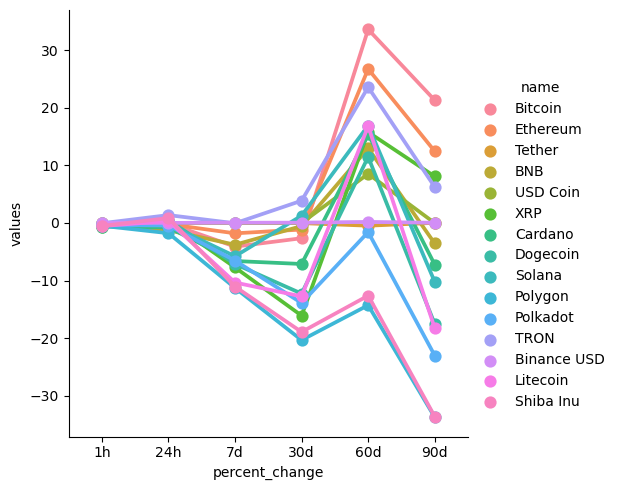

In [54]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [59]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,27567.19988,2023-05-10 08:56:13.736770+00:00


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

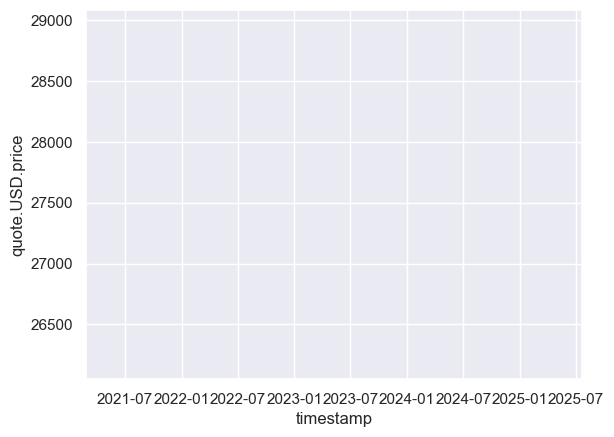

In [62]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp',y='quote.USD.price',data=df10)